In [1]:
import numpy as np 
import pandas as pd


In [6]:
data = np.array([50, 52, 48, 51, 49, 53, 50, 52, 500, 48])
mean = np.median(data)
std = np.std(data)
zscore = (data - mean) / std
out = data[np.abs(zscore) > 3 ]
print(out)

[500]


In [10]:
q1 = np.percentile(data , 25)
q3 = np .percentile(data , 75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = data[ ( data < lower_fence) | ( data > upper_fence )]
print( outliers)

[500]


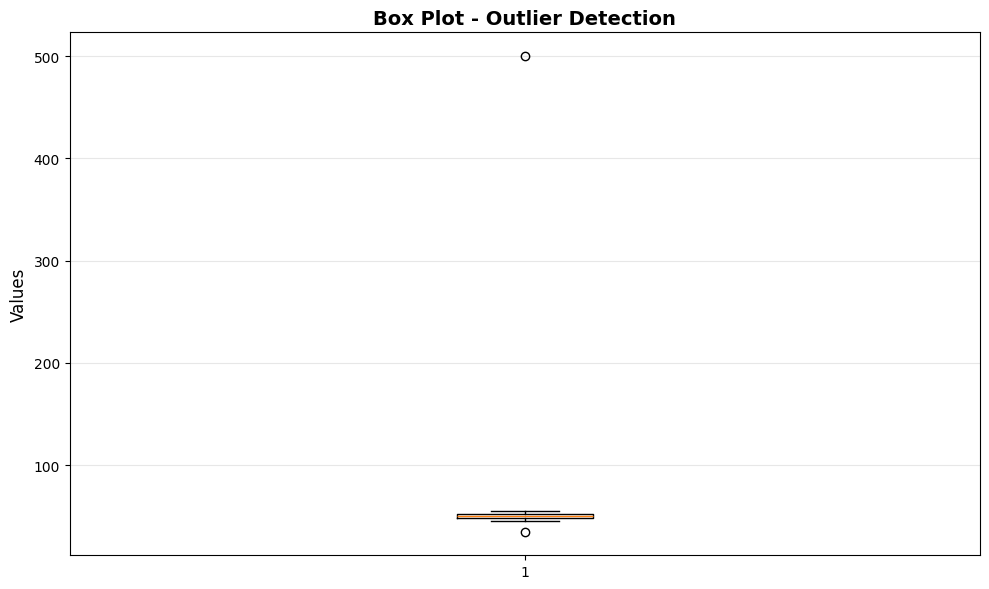

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True)
plt.title('Box Plot - Outlier Detection', fontsize=14,
fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
df = pd.DataFrame({
 'Age': [25, 30, 35, 40, 150, 28, 32, 45],
 'Salary': [50000, 60000, 70000, 80000, 90000, 55000, 65000,
500000]
})
print("Original Data:")
print(df)
print(f"\nOriginal shape: {df.shape}")

Original Data:
   Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
4  150   90000
5   28   55000
6   32   65000
7   45  500000

Original shape: (8, 2)


In [24]:


def remove_outliers(df, column):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    df_filtered = df[
        (df[column] >= lower_fence) &
        (df[column] <= upper_fence)
    ]
    return df_filtered
df_clean = remove_outliers(df, 'Age')
df_clean = remove_outliers(df_clean, 'Salary')
print(df_clean)

   Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
5   28   55000
6   32   65000


In [26]:
df = pd.DataFrame({
 'Age': [25, 30, 35, 40, 150, 28, 32, 45,5],
 'Salary': [50000, 60000, 70000, 80000, 90000, 55000, 65000,
500000,20000]
})
# Capping using IQR method
def cap_outliers_iqr(df, column):
 Q1 = df[column].quantile(0.25)
 Q3 = df[column].quantile(0.75)
 IQR = Q3 - Q1
 lower_fence = Q1 - 1.5 * IQR
 upper_fence = Q3 + 1.5 * IQR

 # Cap values
 df[column] = np.where(df[column] < lower_fence, lower_fence,
df[column])
 df[column] = np.where(df[column] > upper_fence, upper_fence,
df[column])

 return df
df_capped = df.copy()
df_capped = cap_outliers_iqr(df_capped, 'Age')
df_capped = cap_outliers_iqr(df_capped, 'Salary')
print(df_capped)

    Age    Salary
0  25.0   50000.0
1  30.0   60000.0
2  35.0   70000.0
3  40.0   80000.0
4  58.0   90000.0
5  28.0   55000.0
6  32.0   65000.0
7  45.0  117500.0
8  10.0   20000.0


In [27]:
!pip install feature_engine
from feature_engine.outliers import Winsorizer
df = pd.DataFrame({
 'Age': [25, 30, 35, 40, 150, 28, 32, 45],
 'Salary': [50000, 60000, 70000, 80000, 90000, 55000, 65000,
500000]
})


In [28]:
winsor = winsorizer(
    capping_method = 'iqr',
    fold = 1.5,
    tail = 'both'
)
df=winsor.fit_transform(df)

NameError: name 'winsorizer' is not defined